In [1]:
import torch
import matplotlib.pyplot as plt
import torch
import numpy as np

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = '/home/kathy531/Caesar-lig/code/AE/scripts/models/numH_0819/'
f=data_path+'model.pkl'
checkpoint=torch.load(f, map_location=torch.device('cpu'))
a=checkpoint['train_loss']['total']
b=checkpoint['valid_loss']['total']
c=checkpoint['train_loss']['recon']
d=checkpoint['valid_loss']['recon']
e=checkpoint['train_loss']['entropy']
f=checkpoint['valid_loss']['entropy']
a_show=[np.mean(col) for col in a]
b_show=[np.mean(col) for col in b]
c_show=[np.mean(col) for col in c]
d_show=[np.mean(col) for col in d]
e_show=[np.mean(col) for col in e]
f_show=[np.mean(col) for col in f]
print(f"train_loss: {a_show}")
print(f"valid_loss: {b_show}")
print(f"train_loss recon: {c_show}")
print(f"valid_loss recon: {d_show}")
print(f"valid_loss entropy: {e_show}")
print(f"valid_loss entropy: {f_show}")
print(len(d_show))

train_loss: [4.255236, 2.177571, 1.8079373, 1.4968649, 1.3344713, 1.2228284, 1.0959679, 0.9679534, 0.8643141, 0.7818356, 0.71311724, 0.65536207, 0.6071119, 0.5708441, 0.54381466, 0.52052844, 0.4989647, 0.47965106, 0.46208465, 0.44627538, 0.43153808, 0.41712844, 0.40256226, 0.38779, 0.372575, 0.35797837, 0.3451856, 0.33443776, 0.3256488, 0.31847504, 0.31225273, 0.3068391, 0.30185688, 0.29731467, 0.29297644, 0.28893572, 0.28494352, 0.28111047, 0.27724832, 0.273563, 0.26987058, 0.26629713, 0.26272067, 0.25930274, 0.25594556, 0.25258172, 0.24923968, 0.24588105, 0.24262887, 0.23947416]
valid_loss: [2.3586266, 2.025223, 1.6618073, 1.4353683, 1.3131424, 1.1942203, 1.0557456, 0.933377, 0.83820564, 0.761176, 0.6972782, 0.64316535, 0.60011035, 0.56883115, 0.54371554, 0.5209154, 0.49998707, 0.48100564, 0.46398696, 0.44825017, 0.4337011, 0.41898534, 0.40424693, 0.38951916, 0.3743139, 0.3608785, 0.34897628, 0.33915463, 0.3312712, 0.3243495, 0.31873456, 0.31329048, 0.3086543, 0.30371347, 0.29937837,

In [2]:
def loss_graph(valid_loss_list, valid, train_loss, train_recon):
    
    x_epoch=list(range(1,len(valid_loss_list)+1))
    
    color='tab:red'
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(x_epoch, valid_loss_list,color=color, label='train_loss')
    plt.plot(x_epoch, valid, color='tab:orange',label='valid_recon')
    plt.plot(x_epoch, train_loss, color='tab:grey',label='train_entropy')
    plt.plot(x_epoch, train_recon, color='tab:blue',label='valid_entropy')
    plt.tick_params(axis='y', labelcolor=color)
    plt.legend( loc='upper right')
    plt.annotate(f'{min(valid_loss_list):.4f}', xy=(x_epoch[-1], valid_loss_list[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:red')
    plt.annotate(f'{min(valid):.4f}', xy=(x_epoch[-1], valid[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:orange')
    plt.annotate(f'{min(train_loss):.4f}', xy=(x_epoch[-1], valid[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:grey')
    plt.annotate(f'{min(train_recon):.4f}', xy=(x_epoch[-1], valid[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='blue')

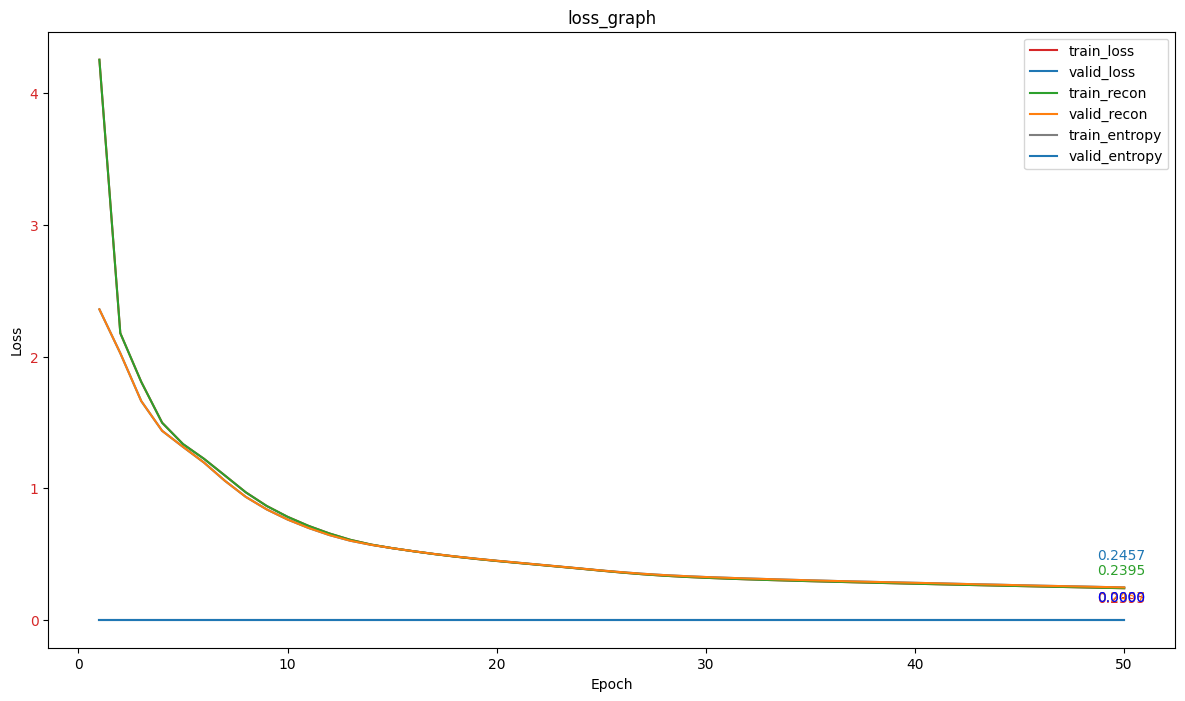

In [4]:
plt.figure(figsize=(32,8))
plt.subplot(121)
plt.title('loss_graph')
(loss_graph(a_show, b_show, c_show, d_show, e_show, f_show))
plt.show()

### TTS

In [5]:
def time_graph(valid_loss_list):
    
    x_epoch=list(range(1,len(valid_loss_list)+1))
    
    color='tab:red'
    plt.xlabel('Epoch')
    plt.ylabel('Time(s)')
    plt.plot(x_epoch, valid_loss_list,color=color, label='load_time')
    #plt.plot(x_epoch, valid_feat, color='tab:blue',label='valid')
    
    plt.tick_params(axis='y', labelcolor=color)
    plt.legend( loc='upper right')
    plt.annotate(f'{min(valid_loss_list):.4f}', xy=(x_epoch[-1], valid_loss_list[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:red')
    
    

In [18]:
train_time=[0.07659006,0.081203222,0.0858417,0.0791011,0.08171010,0.0801138878]
loss_text_ce=[0.026308,0.026177527,0.02607671,0.0258955,0.02561752,0.0254294]
loss_mel_ce=[3.478341,3.3407538,3.2540133,3.166160,2.98742294,2.8986752]
loss_total = [3.5046492,3.66693143,3.28009009,3.1920557,3.01304054,2.9241047]

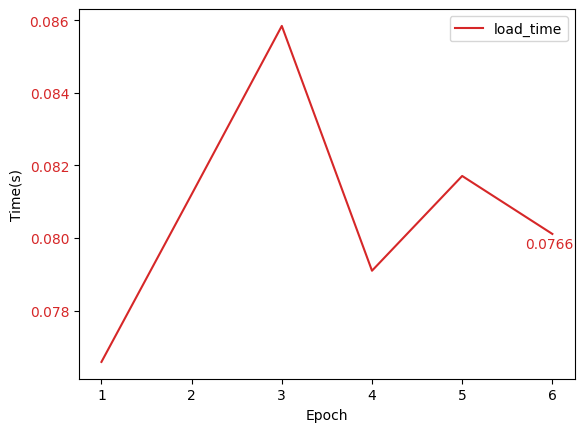

In [7]:
time_graph(train_time)

In [3]:
def loss_graph_tts(valid_loss_list, valid_feat):
    
    x_epoch=list(range(1,len(valid_loss_list)+1))
    
    color='tab:red'
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(x_epoch, valid_loss_list,color=color, label='train')
    plt.plot(x_epoch, valid_feat, color='tab:blue',label='valid')
    
    
    plt.tick_params(axis='y', labelcolor=color)
    plt.legend( loc='lower left')
    plt.annotate(f'{min(valid_loss_list):.4f}', xy=(x_epoch[-1], valid_loss_list[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:red')
    plt.annotate(f'{min(valid_feat):.4f}', xy=(x_epoch[-1], valid_feat[-1]), 
                 xytext=(15, 20), textcoords='offset points', ha='right', color='tab:blue')
    
    

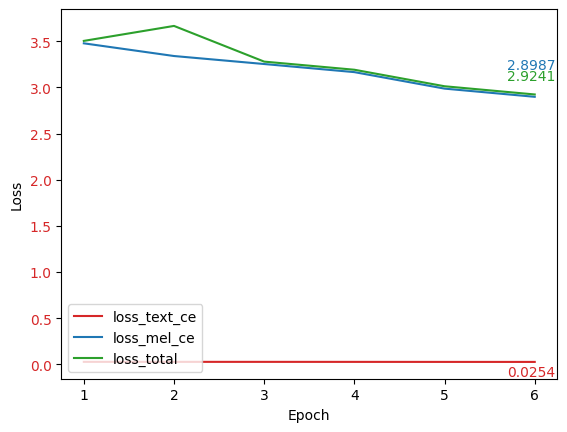

In [26]:
loss_graph_tts(loss_text_ce,loss_mel_ce,loss_total)

### MaskGAE(en:8. de:8, LR: 1e-5)

In [9]:
import torch
import numpy as np
data_path = '/home/kathy531/Caesar-lig/code/MaskGAE/scripts/models/prac_0814/'
f=data_path+'model.pkl'
checkpoint=torch.load(f, map_location=torch.device('cpu'))
a=checkpoint['train_loss']['total'][3:]
b=checkpoint['valid_loss']['total'][3:]
c=checkpoint['train_loss']['lossKL'][3:]
d=checkpoint['valid_loss']['lossKL'][3:]
e=checkpoint['train_loss']['lossCE']
f=checkpoint['valid_loss']['lossCE']
a_show=[np.mean(col) for col in a]
b_show=[np.mean(col) for col in b]
c_show=[np.mean(col) for col in c]
d_show=[np.mean(col) for col in d]
e_show=[np.mean(col) for col in e]
f_show=[np.mean(col) for col in f]
print(f"train_loss: {a_show}")
print(f"valid_loss: {b_show}")
print(f"train_loss lossKL: {c_show}")
print(f"valid_loss lossKL: {d_show}")
print(f"valid_loss lossCE: {e_show}")
print(f"valid_loss lossCE: {f_show}")
print(len(d_show))

train_loss: [5.7443423, 4.999405, 4.5196576, 4.024174, 3.6444793, 3.3451395, 3.056956, 2.816886, 2.5952444, 2.3902664, 2.2082622, 2.051251, 1.9144968, 1.7942106, 1.684901, 1.5925407, 1.5152619, 1.4586608, 1.4244525, 1.4115863, 1.4061216, 1.4066138, 1.4046305, 1.4046967, 1.404947, 1.4046173, 1.4035649, 1.4028518, 1.4057597, 1.4023796, 1.4030429, 1.4017398, 1.4014543, 1.4006528, 1.4022158, 1.3987772, 1.3999766, 1.3991334, 1.4002355, 1.3998097, 1.3986099, 1.3974739, 1.3984488, 1.3974243, 1.3975469, 1.3974762, 1.3972211]
valid_loss: [6.0995154, 5.158, 4.754082, 4.092343, 3.6766334, 3.3191812, 3.0266173, 2.783517, 2.554917, 2.3423247, 2.1732233, 2.021836, 1.8803931, 1.7616876, 1.6579477, 1.5622401, 1.4899257, 1.4400547, 1.4158837, 1.41004, 1.4071527, 1.4064775, 1.406111, 1.405105, 1.4039731, 1.4055438, 1.414461, 1.402799, 1.4013194, 1.4027995, 1.4031068, 1.3989118, 1.401879, 1.4018342, 1.4021313, 1.3983065, 1.400132, 1.3995026, 1.3980507, 1.3989898, 1.4017746, 1.3968873, 1.3981136, 1.400813

#### MaskGAE CE

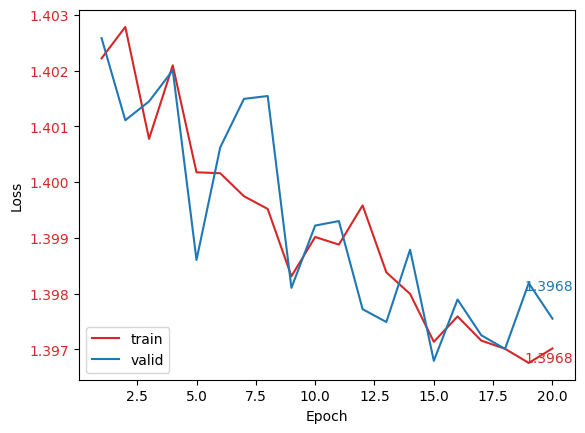

In [13]:
loss_graph_tts(e_show[30:],f_show[30:])

#### MaskGAE KL

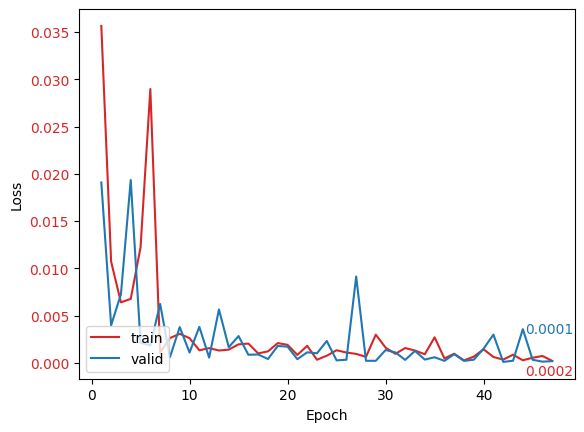

In [24]:
loss_graph_tts(c_show,d_show)

#### MaskGAE total

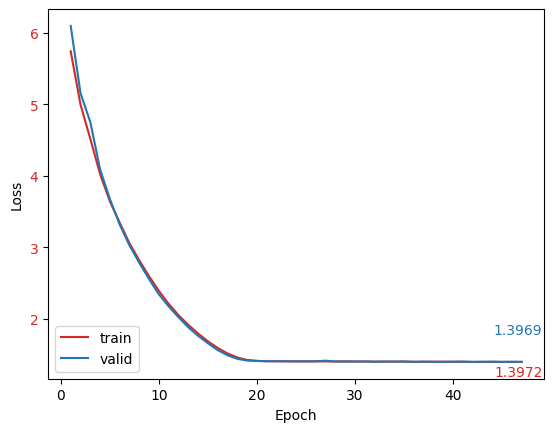

In [12]:
loss_graph_tts(a_show,b_show)

### MaskGAE(en:4, de:4, LR:1e-4)

In [7]:
import torch
import numpy as np
data_path_b = '/home/kathy531/Caesar-lig/code/MaskGAE/scripts/models/prac_0813_rev2/'
f=data_path_b+'model.pkl'
checkpoint_b=torch.load(f, map_location=torch.device('cpu'))
a_b=checkpoint_b['train_loss']['total'][3:]
b_b=checkpoint_b['valid_loss']['total'][3:]
c_b=checkpoint_b['train_loss']['lossKL'][3:]
d_b=checkpoint_b['valid_loss']['lossKL'][3:]
e_b=checkpoint_b['train_loss']['lossCE'][3:]
f_b=checkpoint_b['valid_loss']['lossCE'][3:]
a_show_b=[np.mean(col) for col in a_b]
b_show_b=[np.mean(col) for col in b_b]
c_show_b=[np.mean(col) for col in c_b]
d_show_b=[np.mean(col) for col in d_b]
e_show_b=[np.mean(col) for col in e_b]
f_show_b=[np.mean(col) for col in f_b]
print(f"train_loss: {a_show_b}")
print(f"valid_loss: {b_show_b}")
print(f"train_loss lossKL: {c_show_b}")
print(f"valid_loss lossKL: {d_show_b}")
print(f"valid_loss lossCE: {e_show_b}")
print(f"valid_loss lossCE: {f_show_b}")
print(len(d_show_b))

train_loss: [1.4473828, 1.4303811, 1.4231994, 1.4394963, 1.4020616, 1.4077777, 1.4010537, 1.421524, 1.3915899, 1.3972213, 1.4003309, 1.3970426, 1.4055676, 1.4062198, 1.4191078, 1.3916433, 1.3947566, 1.393988, 1.3972508, 1.3929572, 1.3977331, 1.3997514, 1.3985038, 1.3910228, 1.3979517, 1.3952159, 1.3928432, 1.3970692, 1.4058856, 1.3964784, 1.3962673, 1.390738, 1.3922391, 1.3973488, 1.3894528, 1.3880142, 1.404078, 1.3896415, 1.4015687, 1.3896786, 1.3895609, 1.3880628, 1.3931564, 1.3874711, 1.3892616, 1.3886986, 1.3889633, 1.3902875, 1.3932151, 1.3890094, 1.3901275, 1.3961539, 1.3875288, 1.3874227, 1.3891853, 1.3897823, 1.3872818, 1.387976, 1.3872368, 1.3902013, 1.390257, 1.3958272, 1.3885548, 1.3876519, 1.3888062, 1.3875445, 1.3883375, 1.3890865, 1.3869952, 1.3867749, 1.3897438, 1.3878943, 1.3867533, 1.3877963, 1.3868029, 1.3907644, 1.3871824]
valid_loss: [1.4034998, 1.5056102, 1.4034617, 1.3992882, 1.4008926, 1.4061062, 1.3932227, 1.3910949, 1.3912522, 1.3897746, 1.401162, 1.3892559, 1.

#### MaskGAE total

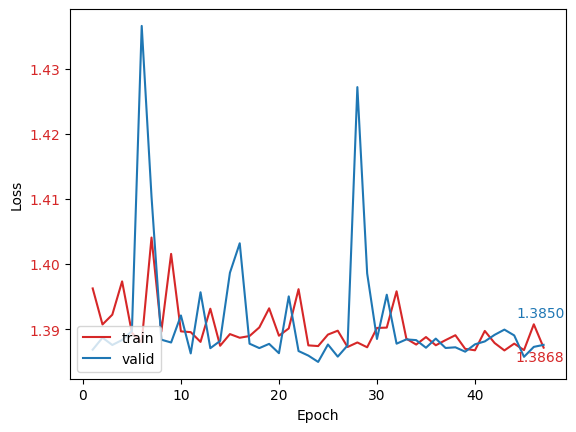

In [8]:
loss_graph_tts(a_show_b[30:],b_show_b[30:])

#### MaskGAE KL

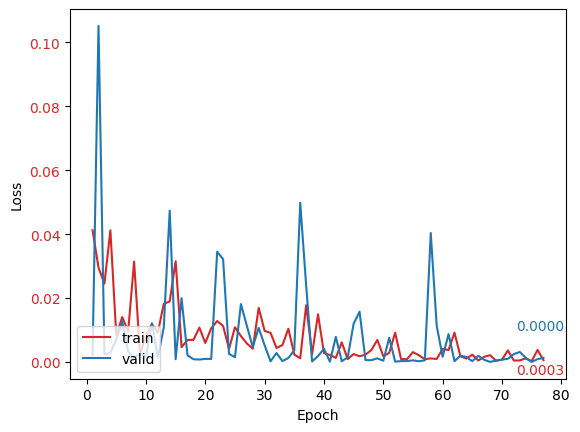

In [33]:
loss_graph_tts(c_show_b,d_show_b)

#### MaskGAE CE

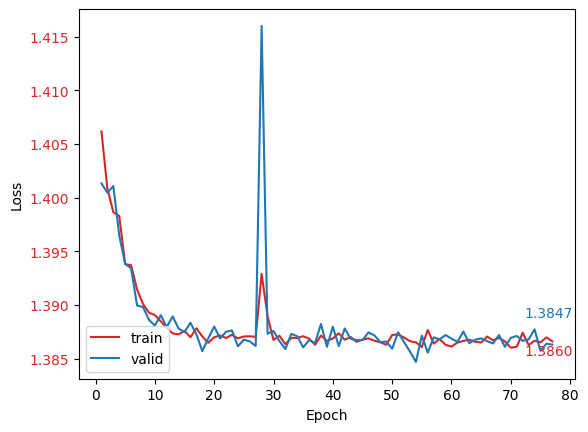

In [11]:
loss_graph_tts(e_show_b,f_show_b)

### AE

##### 0827 current model name: train_0827 (0827 update)

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import torch

In [8]:
data_path = '/home/kathy531/Caesar-lig/code/AE/scripts/models/train_0827/'
f=data_path+'model.pkl'
checkpoint=torch.load(f, map_location=torch.device('cpu'))
a_ae=checkpoint['train_loss']['total']
b_ae=checkpoint['valid_loss']['total']
t_ent=checkpoint['train_loss']['entropy']
v_ent=checkpoint['valid_loss']['entropy']

ae_show=[np.mean(col) for col in a_ae]
be_show=[np.mean(col) for col in b_ae]
tent_show=[np.mean(col) for col in t_ent]
vent_show=[np.mean(col) for col in v_ent]

print(f"train_loss: {ae_show}")
print(f"valid_loss: {be_show}")
print(f"t_ent_loss: {tent_show}")
print(f"v_ent_loss: {vent_show}")

print(len(ae_show))

train_loss: [53.2642, 0.33668497, 0.28701055]
valid_loss: [0.4079998, 0.30797988, 0.2828085]
t_ent_loss: [52.481865, 0.279684, 0.2541989]
v_ent_loss: [0.31439626, 0.2671581, 0.25688806]
3


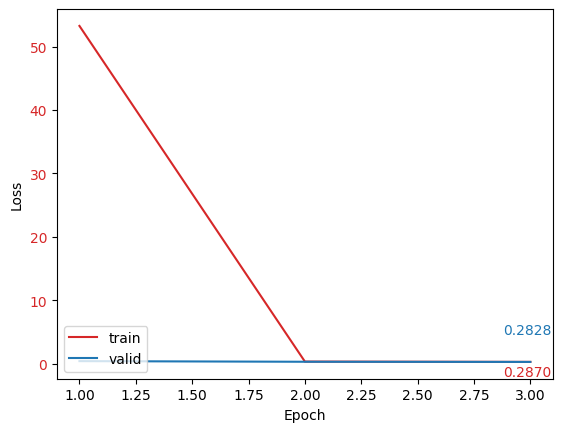

In [9]:
loss_graph_tts(ae_show,be_show)

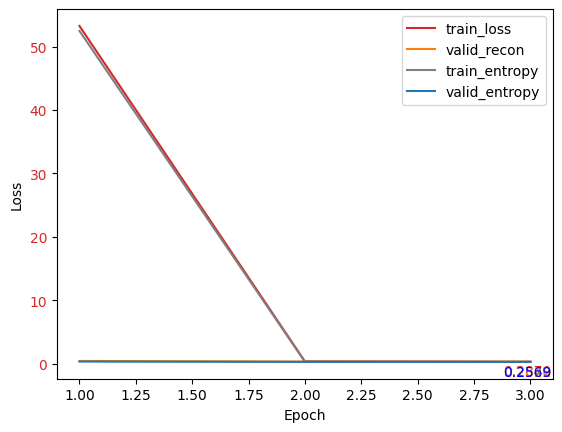

In [10]:
loss_graph(ae_show, be_show, tent_show, vent_show)

In [20]:
import numpy as np
print(-2*np.log(0.5))

1.3862943611198906


In [19]:
data_path = '/home/kathy531/Caesar-lig/code/AE/scripts/models/time0823/'
f=data_path+'model.pkl'
checkpoint=torch.load(f, map_location=torch.device('cpu'))
a_ae=checkpoint['train_loss']['total'][1:]
b_ae=checkpoint['valid_loss']['total'][1:]
t_ent=checkpoint['train_loss']['entropy'][1:]
v_ent=checkpoint['valid_loss']['entropy'][1:]

ae_show=[np.mean(col) for col in a_ae]
be_show=[np.mean(col) for col in b_ae]
tent_show=[np.mean(col) for col in t_ent]
vent_show=[np.mean(col) for col in v_ent]

print(f"train_loss: {ae_show}")
print(f"valid_loss: {be_show}")
print(f"t_ent_loss: {tent_show}")
print(f"v_ent_loss: {vent_show}")

print(len(ae_show))

train_loss: []
valid_loss: []
t_ent_loss: []
v_ent_loss: []
0


### MaskGAE 0826 (update 0827)

In [12]:
data_path = '/home/kathy531/Caesar-lig/code/MaskGAE/scripts/models/train_0827/'
f=data_path+'model.pkl'
checkpoint=torch.load(f, map_location=torch.device('cpu'))
a_ae=checkpoint['train_loss']['total']
b_ae=checkpoint['valid_loss']['total']
t_ce=checkpoint['train_loss']['lossCE']
v_ce=checkpoint['valid_loss']['lossCE']
t_ent=checkpoint['train_loss']['lossENT']
v_ent=checkpoint['valid_loss']['lossENT']
ae_show=[np.mean(col) for col in a_ae]
be_show=[np.mean(col) for col in b_ae]
tent_show=[np.mean(col) for col in t_ent]
vent_show=[np.mean(col) for col in v_ent]
tce_show = [np.mean(col) for col in t_ce]
vce_show = [np.mean(col) for col in v_ce]
print(f"train_loss: {ae_show}")
print(f"valid_loss: {be_show}")
print(f"t_ent_loss: {tent_show}")
print(f"v_ent_loss: {vent_show}")
print(f"tce_loss: {tce_show}")
print(f"vce_loss: {vce_show}")

print(len(ae_show))

train_loss: [258511.78, 1.0448916, 0.35644248, 0.31991264, 0.3128038, 0.31058013, 0.308642]
valid_loss: [1.4992822, 0.47164795, 0.3226611, 0.31091654, 0.31332156, 0.30778804, 0.3076497]
t_ent_loss: [258509.72, 0.0012732069, 0.0006675514, 0.00028320905, 0.0002424696, 0.0002477222, 0.0002197692]
v_ent_loss: [0.00079947937, 0.0015581251, 0.00028568212, 0.00023579114, 0.00026398568, 0.00023405909, 0.00020991551]
tce_loss: [2.101121, 1.0436186, 0.35577494, 0.31962943, 0.31256133, 0.31033242, 0.3084222]
vce_loss: [1.4984828, 0.47008985, 0.32237545, 0.31068075, 0.31305757, 0.30755398, 0.30743977]
7


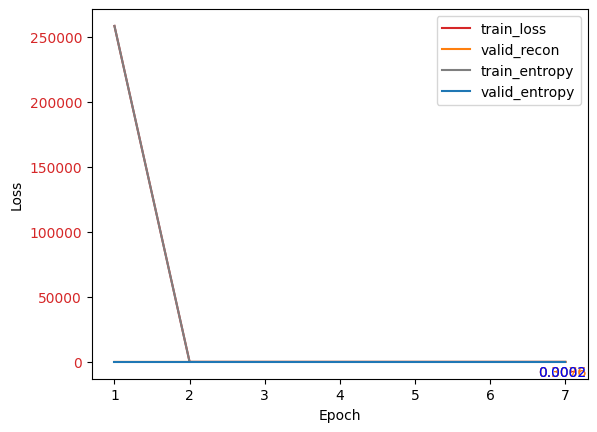

In [14]:
loss_graph(ae_show, be_show, tent_show, vent_show)

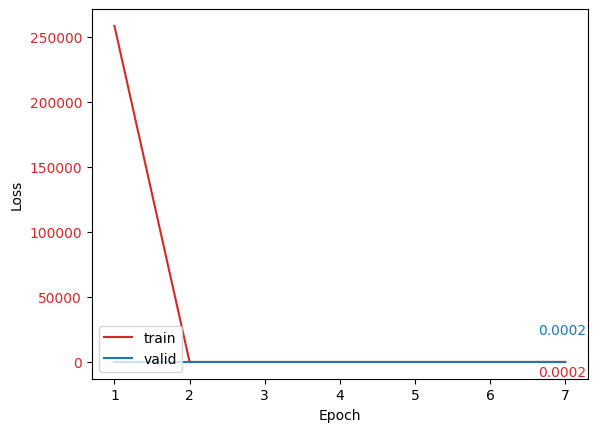

In [15]:
loss_graph_tts(tent_show, vent_show)

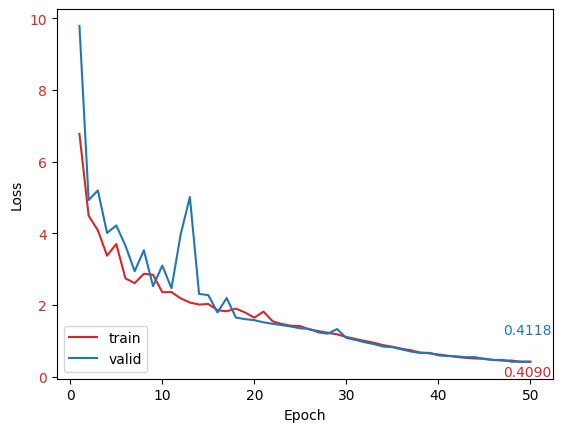

In [25]:
loss_graph_tts(tce_show, vce_show)